In [11]:
import warnings
warnings.filterwarnings('ignore')

ffmpeg -i data/driver.mp4 -ss 0.0 -t 15.749082415749083 -filter:v "crop=1080:1554:0:159, scale=256:256" crop.mp4

C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\dask\config.py:129: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


  data = yaml.load(f.read()) or {}
In C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle:

288it [00:48,  5.95it/s]
289it [00:48,  5.95it/s]
290it [00:48,  5.95it/s]
291it [00:48,  5.95it/s]
292it [00:49,  5.95it/s]
293it [00:49,  5.96it/s]
294it [00:49,  5.96it/s]
295it [00:49,  5.96it/s]
296it [00:49,  5.96it/s]
297it [00:49,  5.96it/s]
298it [00:49,  5.96it/s]
299it [00:50,  5.96it/s]
300it [00:50,  5.97it/s]
301it [00:50,  5.97it/s]
302it [00:50,  5.97it/s]
303it [00:50,  5.97it/s]
304it [00:50,  5.97it/s]
305it [00:51,  5.97it/s]
306it [00:51,  5.97it/s]
307it [00:51,  5.98it/s]
308it [00:51,  5.98it/s]
309it [00:51,  5.98it/s]
310it [00:51,  5.98it/s]
311it [00:51,  5.99it/s]
312it [00:52,  5.99it/s]
313it [00:52,  5.99it/s]
314it [00:52,  5.99it/s]
315it [00:52,  5.99it/s]
316it [00:52,  5.99it/s]
317it [00:52,  5.99it/s]
318it [00:53,  5.99it/s]
319it [00:53,  5.99it/s]
320it [00:53,  6.00it/s]
321it [00:53,  6.00it/s]
322it [00:53,  6.00it/s]
323it [00:53,  6.00it/s]
324it [00:53,  6.00it/s]
325it [00:54,  6.00it/s]
326it [00:54,  6.00it/s]
327it [00:54,  6.01it/s]


      handler_name    : SoundHandler
      encoder         : Lavc58.54.100 aac
frame=  130 fps=0.0 q=29.0 size=       0kB time=00:00:04.57 bitrate=   0.1kbits/s speed=9.14x    
frame=  270 fps=270 q=29.0 size=       0kB time=00:00:09.24 bitrate=   0.0kbits/s speed=9.23x    
frame=  389 fps=259 q=29.0 size=     256kB time=00:00:13.21 bitrate= 158.8kbits/s speed=8.78x    
frame=  472 fps=250 q=-1.0 Lsize=     493kB time=00:00:15.76 bitrate= 255.9kbits/s speed=8.36x    
video:227kB audio:248kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 3.800230%
[libx264 @ 0000021dcc0000c0] frame I:2     Avg QP:21.79  size:  6266
[libx264 @ 0000021dcc0000c0] frame P:119   Avg QP:23.42  size:  1295
[libx264 @ 0000021dcc0000c0] frame B:351   Avg QP:26.65  size:   184
[libx264 @ 0000021dcc0000c0] consecutive B-frames:  0.8%  0.0%  0.0% 99.2%
[libx264 @ 0000021dcc0000c0] mb I  I16..4:  7.8% 63.7% 28.5%
[libx264 @ 0000021dcc0000c0] mb P  I16..4:  0.1%  0.4%  0.1%  P16..4: 48.9% 22.7% 11

In [12]:
import matplotlib.pyplot as plt
import skimage
import imageio
import math
import face_alignment
import numpy as np
import matplotlib.patches as mpatches
from IPython.display import Video

import os
import yaml
from tqdm import tqdm

from skimage.transform import resize
from skimage import img_as_ubyte
import torch
from sync_batchnorm import DataParallelWithCallback

from modules.generator import OcclusionAwareGenerator
from modules.keypoint_detector import KPDetector
from animate import normalize_kp
from scipy.spatial import ConvexHull


%matplotlib inline


In [13]:
def plot_images(images, bboxes=None):
    fig = plt.figure(figsize=(15, 15))
    n_row = 4
    n_col = math.ceil(len(images) / n_row)
    for i, im in enumerate(images):
        ax = plt.subplot(n_col, n_row, i+1)
        ax.imshow(im)
        if bboxes is not None:
            (x1, y1, x2, y2) = bboxes[i].flatten()
            rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)
    plt.show()


# Quellen

- Siarohin, A & Lathuilière, S & Tulyakov, S & Ricci, E & Sebe, N 2019 'First Order Motion Model for Image Animation', _Conference on Neural Information Processing Systems (NeurIPS)_, Dezember, 2019

- Bulat, A & Tzimiropoulos, G 2017 'How far are we from solving the 2D & 3D Face Alignment problem? (and a dataset of 230,000 3D facial landmarks', _International Conference on Computer Vision_, 2017

# Data Preprocessing
In einem ersten Schritt müssen wir unsere Daten vorbereiten. Dazu zählt das Video sowie das zu animierende Bild.

### Video

Ein Video besteht aus mehreren Frames:

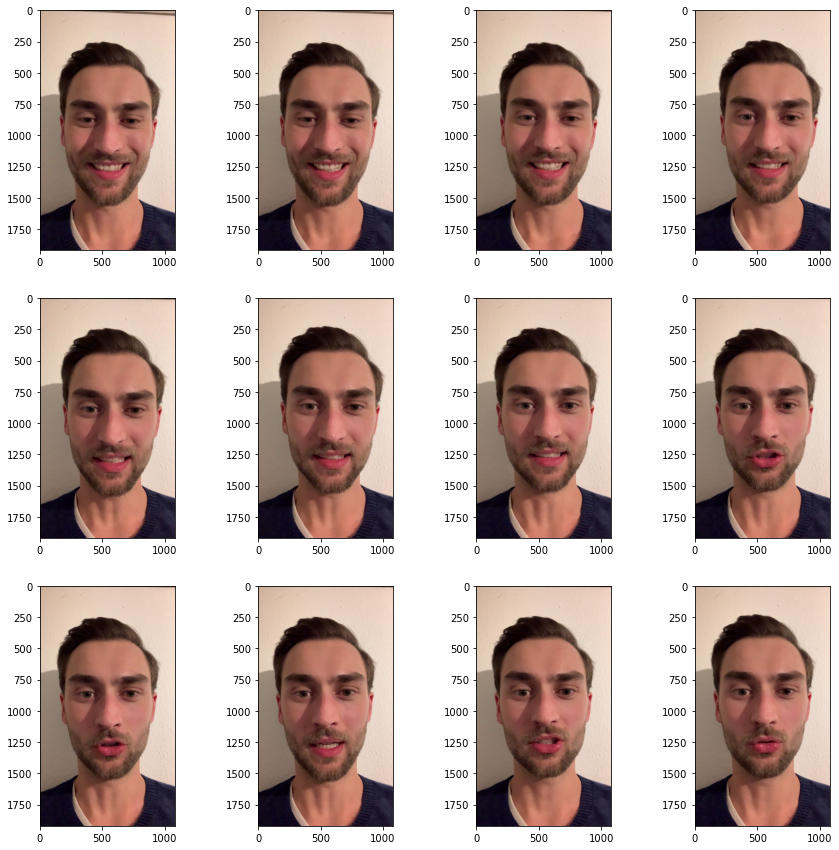

In [14]:
path_video = "data/driver.mp4"
video = imageio.get_reader(path_video)

frames = [f for f in video]
first_frames = [frames[i] for i in range(0,84,7)]
plot_images(first_frames)

### Bounding Boxes

Für unser Fake-Video konzentrieren wir uns nur auf das Gesicht. Daher wollen wir das Video entsprechend zuschneiden.
Wir suchen in den einzelnen Frames nach dem Gesicht und zeichnen eine Bounding Box darum:

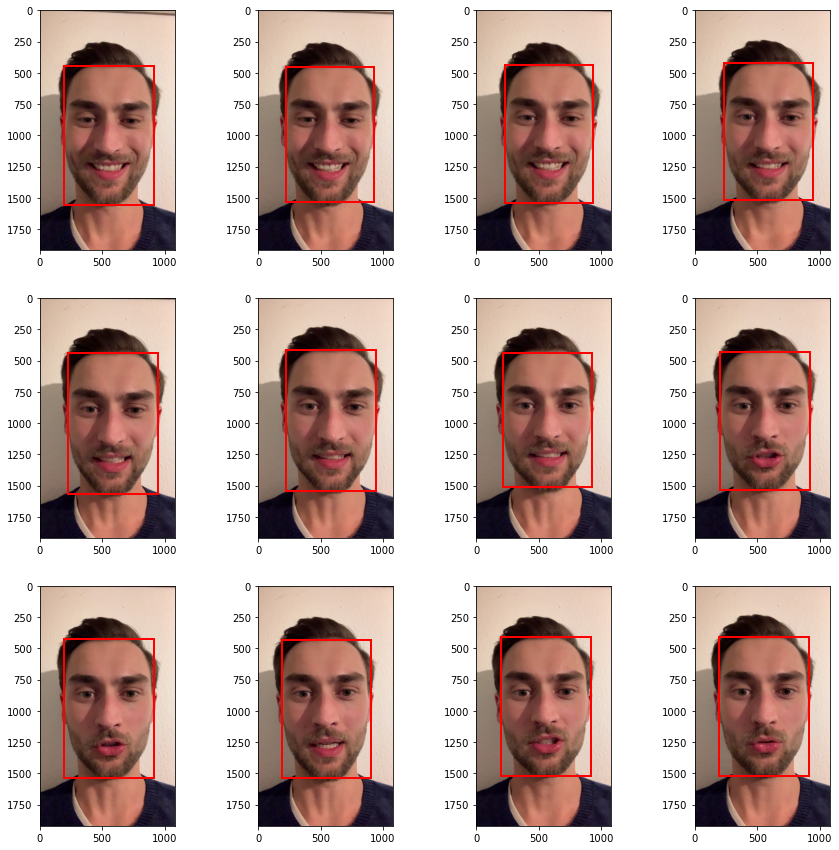

In [15]:
device = 'cpu'
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=False, device=device)

def extract_bbox(frame, fa):
    if max(frame.shape[0], frame.shape[1]) > 640:
        scale_factor =  max(frame.shape[0], frame.shape[1]) / 640.0
        frame = resize(frame, (int(frame.shape[0] / scale_factor), int(frame.shape[1] / scale_factor)))
        frame = img_as_ubyte(frame)
    else:
        scale_factor = 1
    frame = frame[..., :3]
    bboxes = fa.face_detector.detect_from_image(frame[..., ::-1])
    if len(bboxes) == 0:
        return []
    return np.array(bboxes)[:, :-1] * scale_factor

bboxes = []
for frame in first_frames:
    bboxes.append(extract_bbox(frame, fa))
plot_images(first_frames, bboxes)

Jedes Frame hat die Bounding Box an einer anderen Position. Deshalb berechnen wir Rechteck, welches alle Bounding Boxen umschliesst:

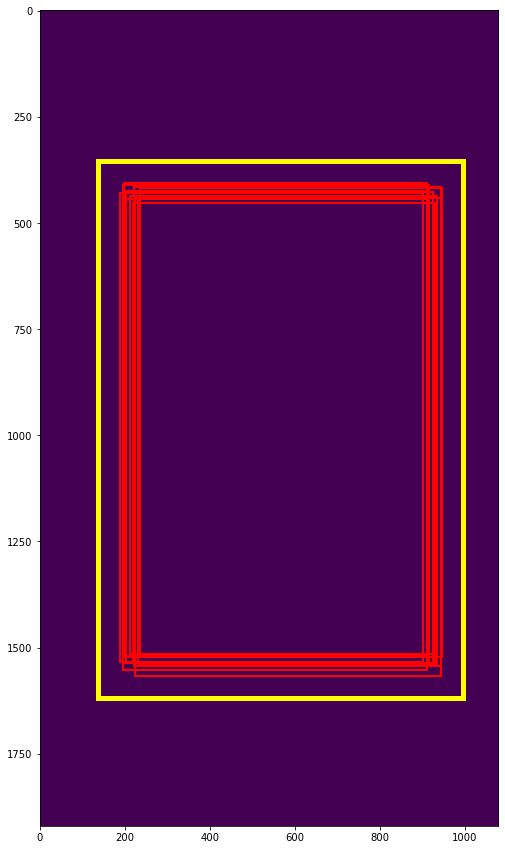

In [16]:
x, y = [], []
tol = 50
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(np.ones((1920, 1080)))
for bbox in bboxes:
    (x1, y1, x2, y2) = bbox.flatten()
    ax.add_patch(mpatches.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2))
    x.append(x1), x.append(x2), y.append(y1), y.append(y2)
ax.add_patch(mpatches.Rectangle((np.min(x)-tol, np.min(y)-tol), np.max(x)-np.min(x)+2*tol, np.max(y)-np.min(y)+2*tol, fill=False, edgecolor='yellow', linewidth=5))
plt.show()

### Video zuschneiden

Nachdem wir die Bounding-Boxen für jedes Frame gefunden haben, schneiden wir das Video entsprechend zu. Damit es schneller geht, verkleinern wir die Frames. Zusätzlich verändern wir die Grösse von jedem Frame, so dass diese der Grösse unseres Bildes entsprechen:

In [17]:
driv_video = "crop.mp4"
img = "data/parmelin.jpg"

In [18]:
!python ../crop-video.py --inp data/driver.mp4

ffmpeg -i data/driver.mp4 -ss 0.0 -t 15.749082415749083 -filter:v "crop=1080:1554:0:159, scale=256:256" crop.mp4

C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\dask\config.py:129: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.


  data = yaml.load(f.read()) or {}
In C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\paess\Anaconda3\envs\first-order-model\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 

288it [00:46,  6.17it/s]
289it [00:46,  6.17it/s]
290it [00:46,  6.18it/s]
291it [00:47,  6.18it/s]
292it [00:47,  6.18it/s]
293it [00:47,  6.18it/s]
294it [00:47,  6.18it/s]
295it [00:47,  6.18it/s]
296it [00:47,  6.18it/s]
297it [00:48,  6.18it/s]
298it [00:48,  6.19it/s]
299it [00:48,  6.19it/s]
300it [00:48,  6.19it/s]
301it [00:48,  6.19it/s]
302it [00:48,  6.19it/s]
303it [00:48,  6.19it/s]
304it [00:49,  6.19it/s]
305it [00:49,  6.19it/s]
306it [00:49,  6.20it/s]
307it [00:49,  6.20it/s]
308it [00:49,  6.20it/s]
309it [00:49,  6.20it/s]
310it [00:49,  6.20it/s]
311it [00:50,  6.20it/s]
312it [00:50,  6.21it/s]
313it [00:50,  6.21it/s]
314it [00:50,  6.21it/s]
315it [00:50,  6.21it/s]
316it [00:50,  6.21it/s]
317it [00:51,  6.21it/s]
318it [00:51,  6.21it/s]
319it [00:51,  6.21it/s]
320it [00:51,  6.21it/s]
321it [00:51,  6.21it/s]
322it [00:51,  6.21it/s]
323it [00:51,  6.21it/s]
324it [00:52,  6.22it/s]
325it [00:52,  6.22it/s]
326it [00:52,  6.22it/s]
327it [00:52,  6.22it/s]


      handler_name    : SoundHandler
      encoder         : Lavc58.54.100 aac
frame=  135 fps=0.0 q=29.0 size=       0kB time=00:00:04.73 bitrate=   0.1kbits/s speed=9.44x    
frame=  268 fps=267 q=29.0 size=       0kB time=00:00:09.17 bitrate=   0.0kbits/s speed=9.15x    
frame=  307 fps=111 q=29.0 size=     256kB time=00:00:10.47 bitrate= 200.3kbits/s speed=3.77x    
frame=  448 fps=137 q=29.0 size=     256kB time=00:00:15.16 bitrate= 138.3kbits/s speed=4.63x    
frame=  472 fps=139 q=-1.0 Lsize=     493kB time=00:00:15.76 bitrate= 255.9kbits/s speed=4.64x    
video:227kB audio:248kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 3.800230%
[libx264 @ 000001957c2900c0] frame I:2     Avg QP:21.79  size:  6266
[libx264 @ 000001957c2900c0] frame P:119   Avg QP:23.42  size:  1295
[libx264 @ 000001957c2900c0] frame B:351   Avg QP:26.65  size:   184
[libx264 @ 000001957c2900c0] consecutive B-frames:  0.8%  0.0%  0.0% 99.2%
[libx264 @ 000001957c2900c0] mb I  I16..4:  7.8

In [19]:
Video(driv_video)

### Bild laden

Neben dem Video benötigen wir auch ein Bild von Guy Parmelin

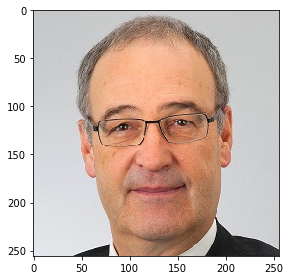

In [20]:
skimage.io.imshow(img)

# Deep Fake

Nachdem die Daten vorbereitet sind, können wir nun unser Fake Video erzeugen. Dies funktioniert mit zwei Modulen


1. Modul zur Schätzung der Bewegung
2. Modul zur Bilderzeugung


### Modul zur Bewegungsabschätzung
- Ein neuronales Netzwerk lernt in Bildern Schlüsselpunkte zu erkennen.

-> Bild Schlüsselpunkte von treibendem Video sowie der Bilddatei

- Wenn die Schlüsselpunkte aus den einzelnen Videoframes verglichen werden, können die Bewegungen abgeschätzt werden

-> Bild einfügen als Beispiel

- Die Bewegungen werden dann kodiert an das Modul zur Bilderzeugung übergeben


### Modul zur Bilderzeugung

- Das zweite Modul erzeugt das Bild. Dazu schätzt es ab, welche Bewegungen durch Verzerren des Bildes bewirkt werden können und wo das Bild "übermalt" werden soll
- Anschliessend werden die angepassten Bilder wieder zu einem Video zusammengefügt



### Training

Ein neuronales Netzwerk erlernt wie es diese Aufgaben vollautomatisch erfüllen kann. Dieses Erlernen erfordert jedoch viel Rechenleistung und dauert lange.

Deshalb verwenden wir in unserem Beispiel ein bereits trainiertes Netzwerk:

In [21]:
def load_checkpoints(config_path, checkpoint_path, cpu=False):

    with open(config_path) as f:
        config = yaml.load(f)

    generator = OcclusionAwareGenerator(**config['model_params']['generator_params'],
                                        **config['model_params']['common_params'])
    if not cpu:
        generator.cuda()

    kp_detector = KPDetector(**config['model_params']['kp_detector_params'],
                             **config['model_params']['common_params'])
    if not cpu:
        kp_detector.cuda()
    
    if cpu:
        checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))
    else:
        checkpoint = torch.load(checkpoint_path)
 
    generator.load_state_dict(checkpoint['generator'])
    kp_detector.load_state_dict(checkpoint['kp_detector'])
    
    if not cpu:
        generator = DataParallelWithCallback(generator)
        kp_detector = DataParallelWithCallback(kp_detector)

    generator.eval()
    kp_detector.eval()
    
    return generator, kp_detector

Das neuronale Netzwerk sucht zuerst die Schlüsselpunkte im Bild und danach im Video. Anhand dieser Daten wird dann das neue Video erzeugt: 

In [22]:
def make_animation(source_image, driving_video, generator, kp_detector, relative=True, adapt_movement_scale=True, cpu=False):
    with torch.no_grad():
        predictions = []
        source = torch.tensor(source_image[np.newaxis].astype(np.float32)).permute(0, 3, 1, 2)
        if not cpu:
            source = source.cuda()
        driving = torch.tensor(np.array(driving_video)[np.newaxis].astype(np.float32)).permute(0, 4, 1, 2, 3)
        kp_source = kp_detector(source)
        kp_driving_initial = kp_detector(driving[:, :, 0])

        for frame_idx in tqdm(range(driving.shape[2])):
            driving_frame = driving[:, :, frame_idx]
            if not cpu:
                driving_frame = driving_frame.cuda()
            kp_driving = kp_detector(driving_frame)
            kp_norm = normalize_kp(kp_source=kp_source, kp_driving=kp_driving,
                                   kp_driving_initial=kp_driving_initial, use_relative_movement=relative,
                                   use_relative_jacobian=relative, adapt_movement_scale=adapt_movement_scale)
            out = generator(source, kp_source=kp_source, kp_driving=kp_norm)

            predictions.append(np.transpose(out['prediction'].data.cpu().numpy(), [0, 2, 3, 1])[0])
    return predictions

Damit das Resultat noch realistischer aussieht verwenden wir einen Trick. Anstatt dass wir das Video am Anfang starten durchsuchen wir das gesamte Video nach einem Frame, dass am ehesten dem Bild von Herrn Parmelin entspricht. Danach generieren wir das Video von diesem Frame aus je einmal vorwärts und einmal rückwärts. Am Ende setzen wir dann das generierte Video wieder in der korrekten Reihenfolge zusammen:

In [23]:
def find_best_frame(source, driving, cpu=False):

    def normalize_kp(kp):
        kp = kp - kp.mean(axis=0, keepdims=True)
        area = ConvexHull(kp[:, :2]).volume
        area = np.sqrt(area)
        kp[:, :2] = kp[:, :2] / area
        return kp

    fa = face_alignment.FaceAlignment(face_alignment.LandmarksType._2D, flip_input=True, device='cpu' if cpu else 'cuda')
    kp_source = fa.get_landmarks(255 * source)[0]
    kp_source = normalize_kp(kp_source)
    norm  = float('inf')
    frame_num = 0
    for i, image in tqdm(enumerate(driving)):
        kp_driving = fa.get_landmarks(255 * image)[0]
        kp_driving = normalize_kp(kp_driving)
        new_norm = (np.abs(kp_source - kp_driving) ** 2).sum()
        if new_norm < norm:
            norm = new_norm
            frame_num = i
    return frame_num

Anstatt das erste Frame (mitte) verwenden wir nun also das für den Algorithmus "beste" Frame (rechts) um die Bewegungen zu berechnen:

472it [01:38,  4.80it/s]


Text(0.5, 1.0, 'Bestes Frame')

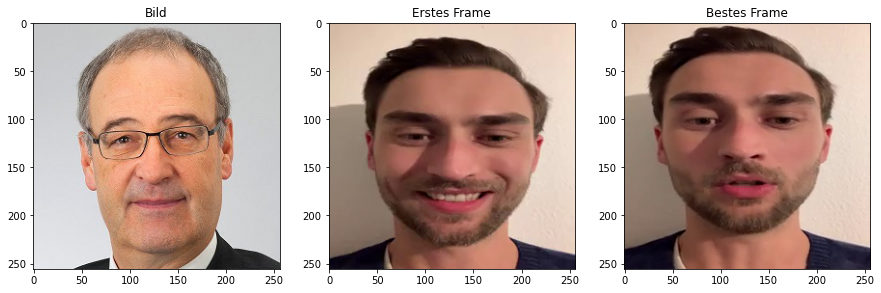

In [24]:
source_image = imageio.imread(img)
reader = imageio.get_reader(driv_video)
driving_video = [f for f in reader]
source_image = resize(source_image, (256, 256))[..., :3]
driving_video = [resize(frame, (256, 256))[..., :3] for frame in driving_video]

best_frame = find_best_frame(source_image, driving_video)

fig = plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(source_image)
plt.title("Bild")
plt.subplot(1,3,2)
plt.imshow(driving_video[0])
plt.title("Erstes Frame")
plt.subplot(1,3,3)
plt.imshow(driving_video[best_frame])
plt.title("Bestes Frame")

Nun müssen wir diese Module nur noch zusammensetzen und ausführen.

In [25]:
fps = reader.get_meta_data()['fps']
config = "../config/vox-adv-256.yaml"
checkpoint = "../checkpoints/vox-adv-cpk.pth.tar"
result = "result.mp4"
cpu = False


generator, kp_detector = load_checkpoints(config_path=config, checkpoint_path=checkpoint, cpu=cpu)

i = best_frame
driving_forward = driving_video[i:]
driving_backward = driving_video[:(i+1)][::-1]
predictions_forward = make_animation(source_image, driving_forward, generator, kp_detector, relative=True, adapt_movement_scale=True, cpu=cpu)
predictions_backward = make_animation(source_image, driving_backward, generator, kp_detector, relative=True, adapt_movement_scale=True, cpu=cpu)
predictions = predictions_backward[::-1] + predictions_forward[1:]
imageio.mimsave(result, [img_as_ubyte(frame) for frame in predictions], fps=fps)

100%|██████████| 311/311 [00:19<00:00, 15.92it/s]


### Videos zusammenfügen

Damit wir das Resultat besser sehen, fügen wir das originale sowie das erzeugte Video zusammen.

In [26]:
os.system("ffmpeg -i crop.mp4 -i result.mp4 -filter_complex hstack finished_video.mp4")

1

### Resultat

In [27]:
Video("finished_video.mp4")

# Weitere Möglichkeiten

### Verschiedene Annimationen:

![Screenshot](../sup-mat/vox-teaser.gif)

![Screenshot](../sup-mat/fashion-teaser.gif)

![Screenshot](../sup-mat/mgif-teaser.gif)


### Face Swap

![Screenshot](../sup-mat/face-swap.gif)